In [2]:
import os
import re
dir = './results_grpc_compare_c07/'
pattern = re.compile(r"results_ping_pong_sync_atomics_7x[0-9]+")
files = [f for f in os.listdir(dir) if pattern.match(f)]
values = {}
for f in files:
    split = f.split('x')
    num_clients = int(split[1])
    f = open(dir + f, "r")
    p50 = 0
    qps = 0
    for line in f:
        if "p50" in line:
            p50 = int(re.search(r'value: \d+', line).group().removeprefix("value: "))
        if "qps" in line:
            qps = int(re.search(r' \d+', line).group().lstrip())
    values[num_clients] = (p50, qps)
for key in sorted(values):
    print("num clients %d p50 %d qps %d" % (key, values[key][0], values[key][1]))

num clients 1 p50 106 qps 8856
num clients 2 p50 117 qps 16011
num clients 4 p50 136 qps 27286
num clients 5 p50 148 qps 31083
num clients 6 p50 164 qps 33662
num clients 8 p50 172 qps 42495
num clients 10 p50 202 qps 46042
num clients 12 p50 254 qps 45001
num clients 14 p50 291 qps 46180
num clients 16 p50 343 qps 45248
num clients 18 p50 384 qps 45034
num clients 20 p50 429 qps 45183


[8856, 16011, 27286, 31083, 33662, 42495, 46042, 45001, 46180, 45248, 45034, 45183]
[106, 117, 136, 148, 164, 172, 202, 254, 291, 343, 384, 429]


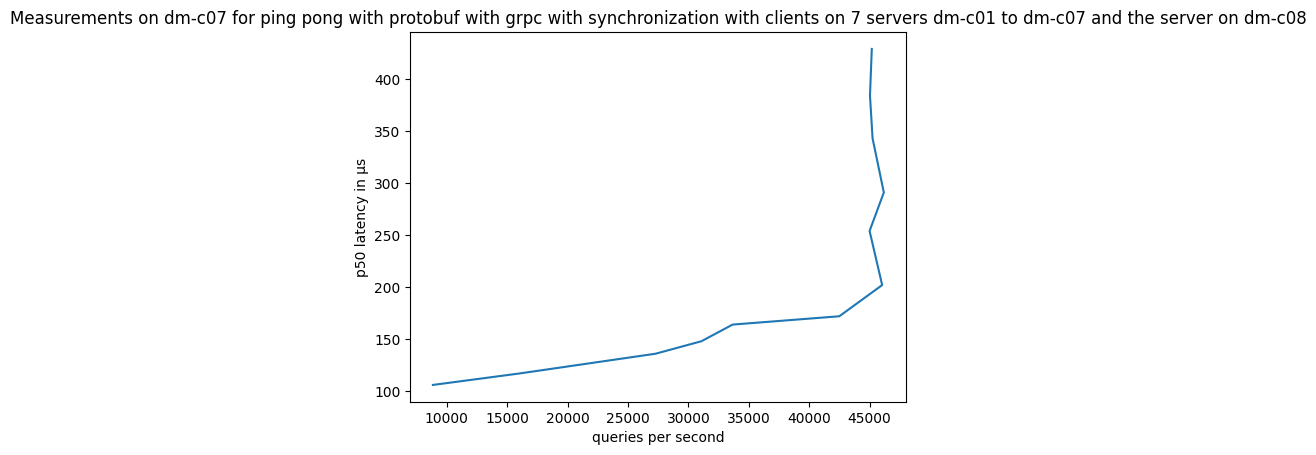

In [3]:
import matplotlib.pyplot as plt

x_values = [values[key][1] for key in sorted(values) if key < 50]
y_values = [values[key][0] for key in sorted(values) if key < 50]
print(x_values)
print(y_values)
plt.xlabel("queries per second")
plt.ylabel("p50 latency in μs")
plt.title('Measurements on dm-c07 for ping pong with protobuf with grpc with synchronization with clients on 7 servers dm-c01 to dm-c07 and the server on dm-c08')
plt.plot(x_values, y_values)